I download the trading pauses for all securities that are primary listed in Nasdaq.  

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')


In [ ]:
##### Code I used to parse the data from nasdaqtrader.com : 

import feedparser
import pandas as pd
import time
dates=[]
for single_date in pd.DatetimeIndex(start='2010-01-01',end='2018-06-01', freq='B'):
    dates.append(single_date.strftime("%m%d%Y"))
urls=[]
for date in dates:
    urls.append('http://www.nasdaqtrader.com/rss.aspx?feed=tradehalts&haltdate='+date)

df=pd.DataFrame()
for url in urls: 
    NewsFeed = feedparser.parse(url)
    entry = NewsFeed.entries
    data=pd.DataFrame(entry)
    df=df.append(data)
df.reset_index(inplace=True, drop=True)
df.to_csv('~/Desktop/my papers/pre-dissertation fellowship ap/nasdaq_data_tp/trading pauses.csv')


##### data was downloaded from:
https://www.nasdaqtrader.com/Trader.aspx?id=TradeHaltRSS

for more info on symbols used, see: 
https://www.nasdaqtrader.com/Trader.aspx?id=SymbolDirDefs
https://www.nasdaqtrader.com/Trader.aspx?id=TradeHaltCodes



In [2]:
df=pd.read_csv('trading pauses.csv')


### Choose ludp trading pauses. Note that the df dataset contains other trading halts as well, not only the trading pauses of interest

In [3]:
lp=df[df['ndaq_reasoncode']=='LUDP']

### Format the time index

In [4]:
format = "%m/%d/%Y %H:%M:%S"
times = pd.to_datetime(lp.ndaq_haltdate + ' ' + lp.ndaq_halttime, format=format)
lp.set_index(times, inplace=True)
# and maybe for cleanup
#lp = lp.drop(['YYYYMMDD','HH'], axis=1)

### Drop unnecessary columns

In [5]:
lp=lp.drop(['Unnamed: 0', 'ndaq_haltdate', 'ndaq_halttime','ndaq_pausethresholdprice', 'published', 'published_parsed', 'summary',
       'summary_detail', 'title', 'title_detail'],axis=1)

### Plot number of halts for each day, very rough graph

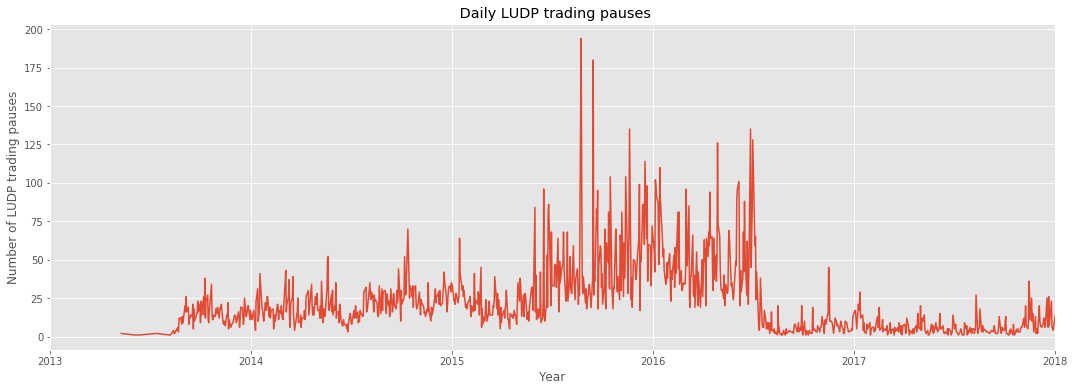

In [6]:
lp.groupby(lp.index.date)['ndaq_issuesymbol'].count().plot(figsize=(18,6), xlim=('2013','2018'), title=' Daily LUDP trading pauses')
plt.xlabel("Year")
plt.ylabel("Number of LUDP trading pauses")
plt.show()

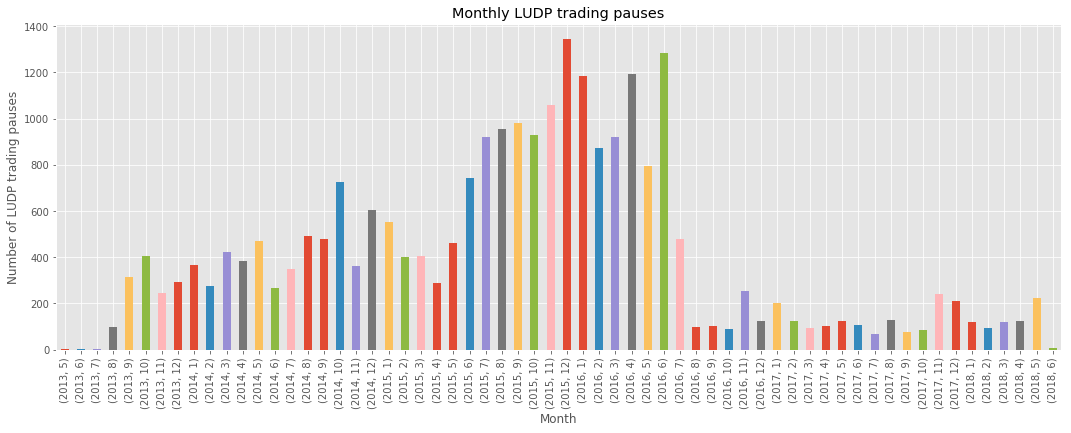

In [7]:
monthly=lp.groupby([lp.index.map(lambda x: x.year),lp.index.map(lambda x: x.month)])['ndaq_issuesymbol'].count()
monthly.plot(kind= 'bar',figsize=(18,6), xlim=('2013','2018'), title='Monthly LUDP trading pauses')
plt.xlabel("Month")
plt.ylabel("Number of LUDP trading pauses")
plt.show()

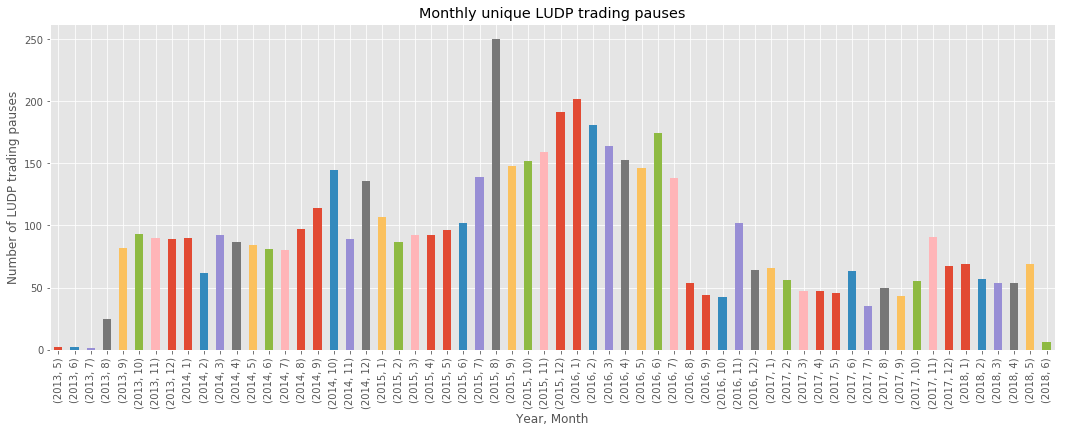

In [8]:
monthly=lp.groupby([lp.index.map(lambda x: x.year),lp.index.map(lambda x: x.month)])['ndaq_issuesymbol'].nunique()
monthly.plot(kind= 'bar',figsize=(18,6), xlim=('2013','2018'), title='Monthly unique LUDP trading pauses')
plt.xlabel("Year, Month")
plt.ylabel("Number of LUDP trading pauses")
plt.show()

In how many exchanges does the nasdaq trading pauses data occur in our dataset? 
Only in Nasdaq (ndaq_mkt='Q')

In [9]:
lp.ndaq_mkt.unique()

array(['Q'], dtype=object)

In [10]:
lp_stock=lp.groupby('ndaq_issuesymbol')['ndaq_reasoncode'].count()

In [11]:
# top 30 NAsdaq stocks entering trading pauses most 
lp_stock.sort_values(ascending=False).head(30)

ndaq_issuesymbol
RDIB     1161
SGYPU     957
IRDMB     803
AMSGP     796
KELYB     722
GALTU     714
PHII      497
FNTC      462
JACQ      286
TRTLU     247
MTBCP     241
WLBPZ     241
JACQU     222
GPIA      221
EMMSP     218
KBSF      217
TROVU     216
ROICU     216
SOHOM     207
AAPC      195
QADB      189
DGICB     175
ROIQU     171
PNRG      167
LTRPB     164
FNTCU     163
QPAC      158
TRTL      155
CADTU     154
PACEU     153
Name: ndaq_reasoncode, dtype: int64

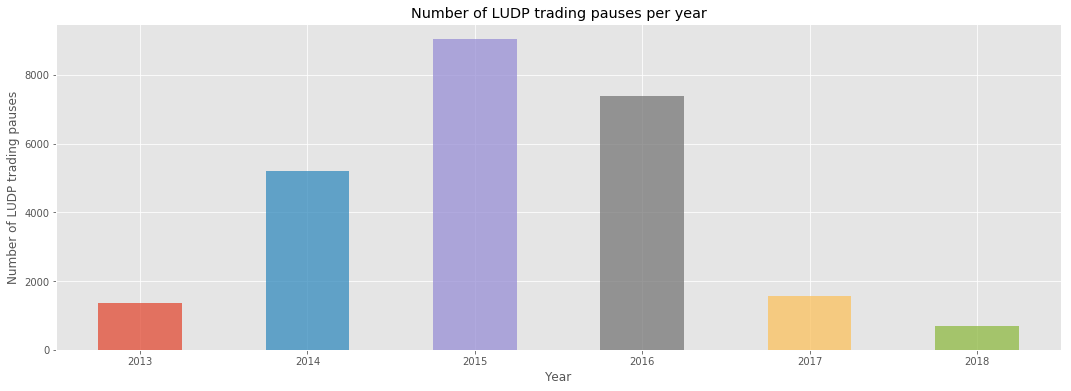

In [12]:
lp.groupby(lp.index.map(lambda x: x.year))['ndaq_issuesymbol'].count().plot(figsize=(18,6),kind='bar',alpha=0.75, rot=0, title='Number of LUDP trading pauses per year')
plt.xlabel("Year")
plt.ylabel("Number of LUDP trading pauses")
plt.show()

#### Majority of of LUDP tading pauses takes place in the first hours of trading

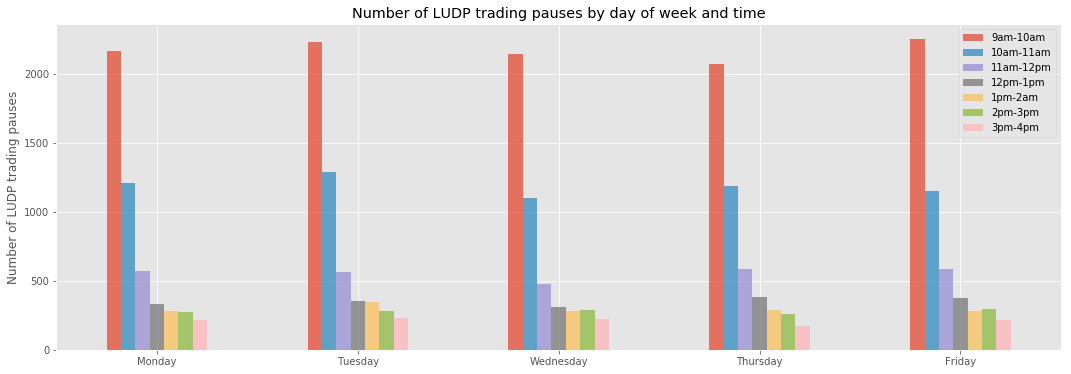

In [13]:
g=lp.groupby([lp.index.map(lambda x: x.weekday),lp.index.map(lambda x: x.hour)])['ndaq_issuesymbol'].count().unstack()
g.columns=['9am-10am','10am-11am','11am-12pm','12pm-1pm','1pm-2am','2pm-3pm','3pm-4pm']
g.index=['Monday','Tuesday','Wednesday','Thursday','Friday']
g.plot(figsize=(18,6),kind='bar',alpha=0.75, rot=0)
plt.title('Number of LUDP trading pauses by day of week and time')
plt.ylabel("Number of LUDP trading pauses")
plt.show()

#### No difference is observed between trading days in terms of LUDP tading pauses

Text(0, 0.5, 'Number of LUDP trading pauses')

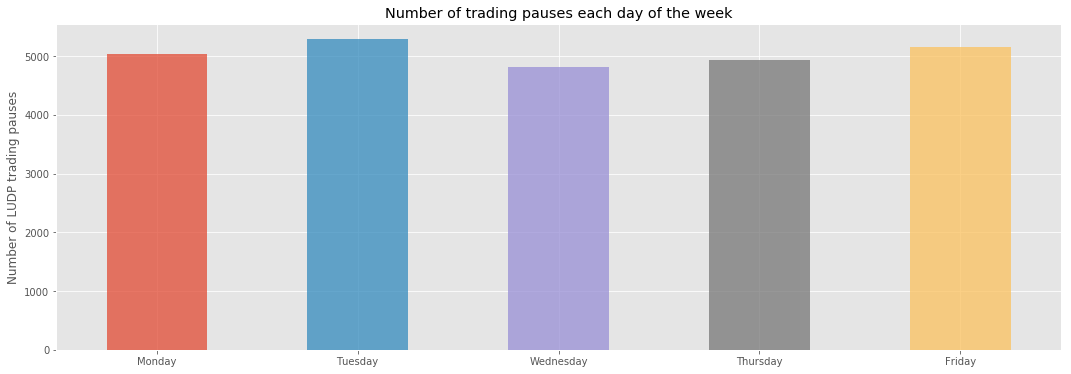

In [14]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
lp.groupby(lp.index.map(lambda x: x.weekday_name))['ndaq_issuesymbol'].count().reindex(cats).plot(figsize=(18,6),kind='bar',alpha=0.75, rot=0, title='Number of trading pauses each day of the week')
plt.ylabel("Number of LUDP trading pauses")



In [15]:
vix=pd.read_csv('vix.csv',parse_dates=True,index_col='Date')
vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-10-14,19.590000,21.020000,19.400000,19.879999,19.879999,0
2010-10-15,20.200001,21.590000,19.020000,19.030001,19.030001,0
2010-10-18,20.430000,20.709999,18.879999,19.090000,19.090000,0
2010-10-19,20.700001,21.350000,19.330000,20.629999,20.629999,0
2010-10-20,21.200001,21.200001,19.670000,19.790001,19.790001,0


### Plot VIX and LUDP count in same graph

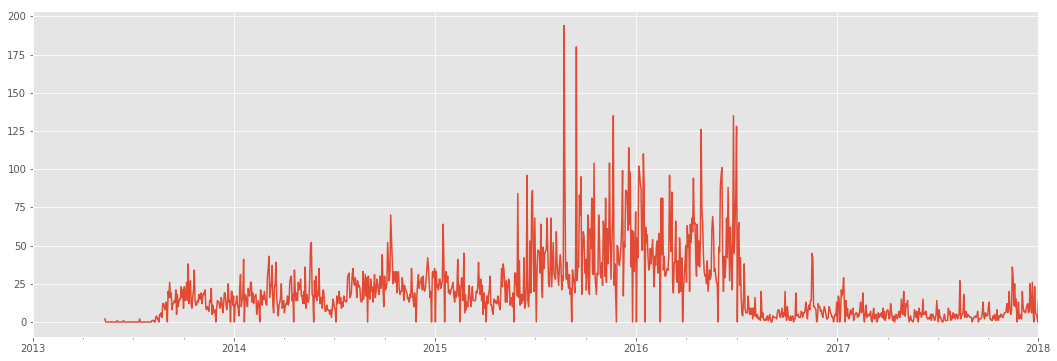

In [16]:
lp['ndaq_issuesymbol'].resample('B').count().plot( figsize=(18,6), xlim=('2013','2018'),label='number of ludp trading pauses')


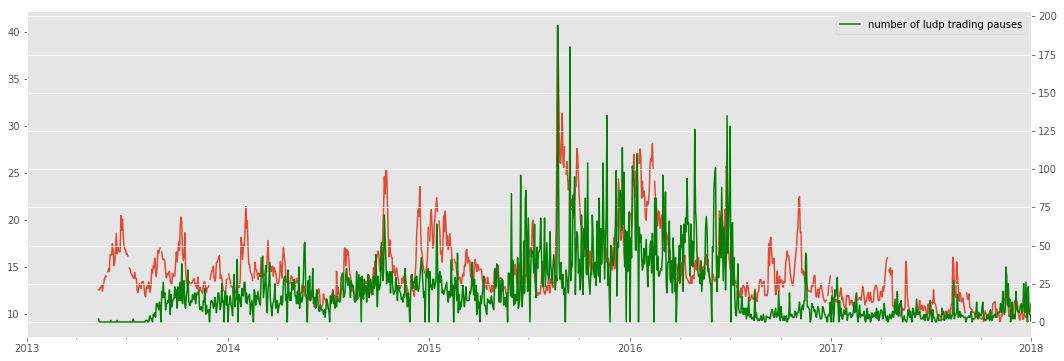

In [17]:
daily=lp.resample('B').count()
dts=daily.merge(vix,how='left',left_index=True, right_index=True)



plt.figure()
dts.Close.plot(figsize=(18,6), xlim=('2013','2018'),label='number of ludp trading pauses')
dts.ndaq_issuesymbol.plot(secondary_y=True, style='g',label='number of ludp trading pauses')
plt.legend()

Text(0, 0.5, 'VIX value')

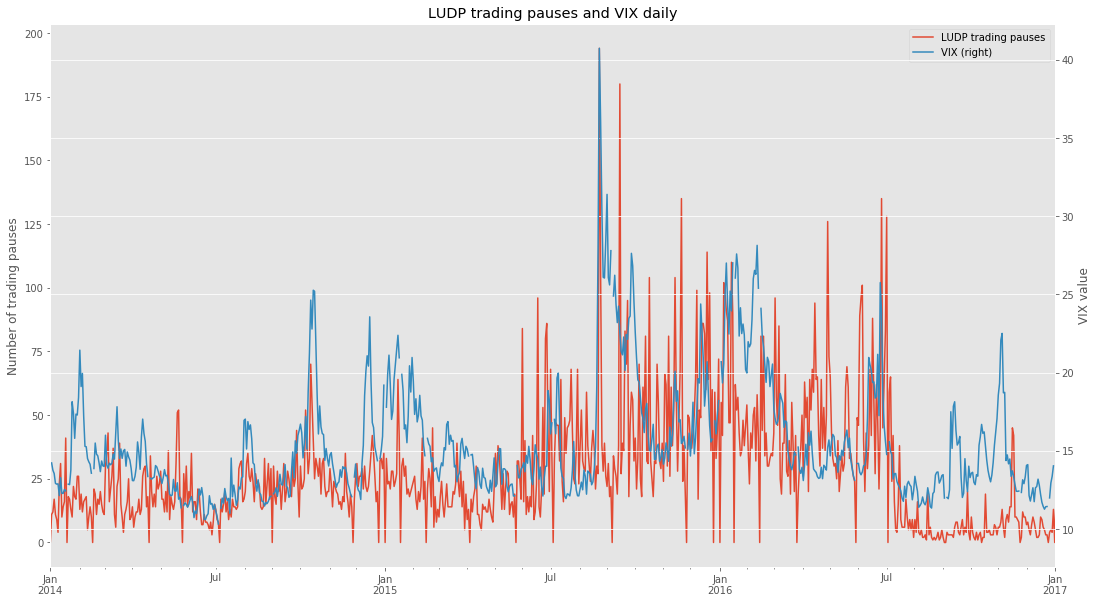

In [18]:
dts=dts[['ndaq_issuesymbol','Close']]
dts.columns=['LUDP trading pauses','VIX']

ax=dts.plot(secondary_y=['VIX'],figsize=(18,10), xlim=('2014','2017'), title='LUDP trading pauses and VIX daily')
ax.set_ylabel('Number of trading pauses')
ax.right_ax.set_ylabel('VIX value')


Text(0, 0.5, 'VIX value')

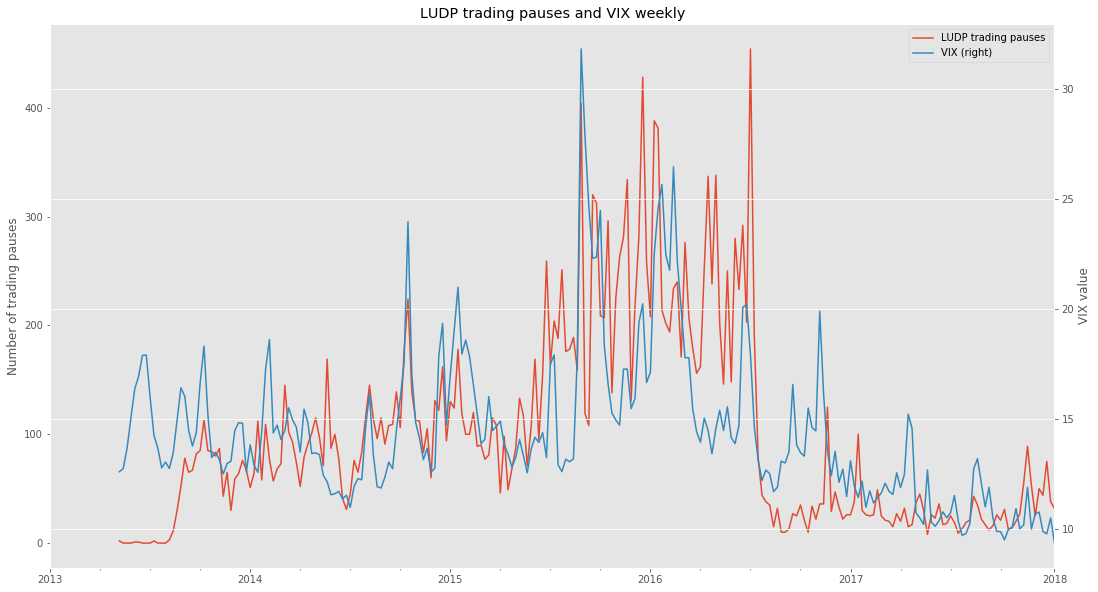

In [19]:
ax=dts.resample('w').agg({'LUDP trading pauses':'sum', 'VIX': 'mean'}).plot(secondary_y=['VIX'],figsize=(18,10), xlim=('2013','2018'), title='LUDP trading pauses and VIX weekly')
ax.set_ylabel('Number of trading pauses')
ax.right_ax.set_ylabel('VIX value')

Text(0, 0.5, 'VIX value')

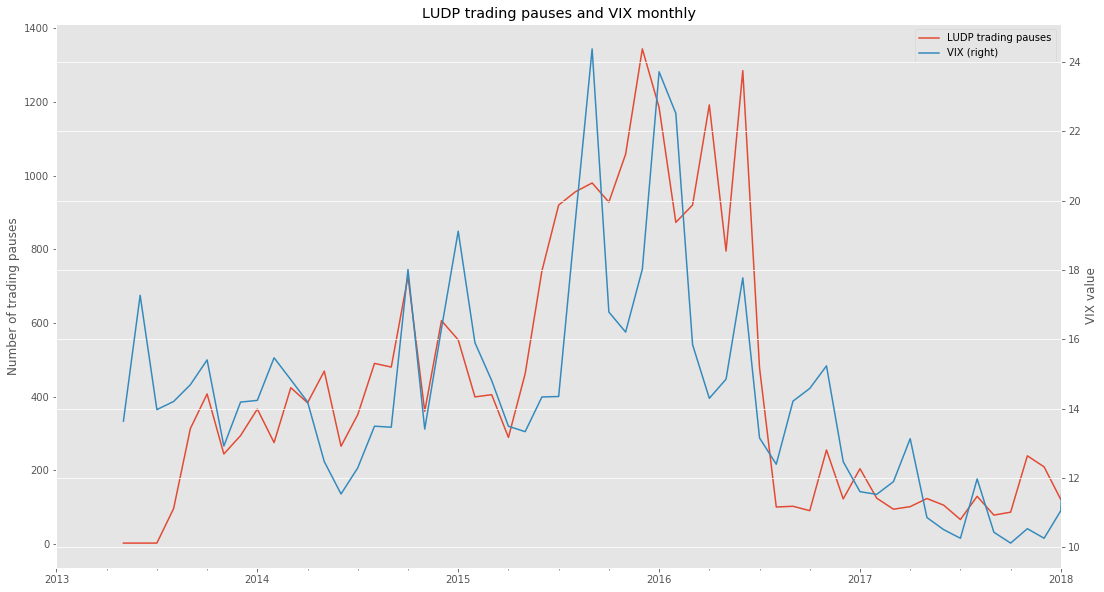

In [20]:
ax=dts.resample('M').agg({'LUDP trading pauses':'sum', 'VIX': 'mean'}).plot(secondary_y=['VIX'],figsize=(18,10), xlim=('2013','2018'), title='LUDP trading pauses and VIX monthly')
ax.set_ylabel('Number of trading pauses')
ax.right_ax.set_ylabel('VIX value')

Text(0, 0.5, 'VIX value')

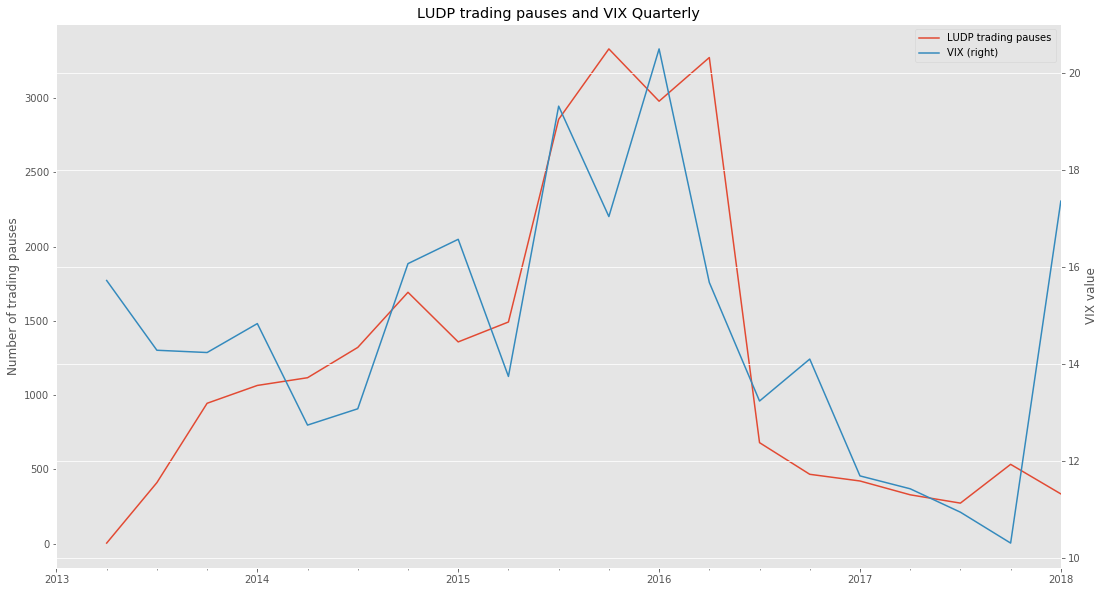

In [21]:
ax=dts.resample('Q').agg({'LUDP trading pauses':'sum', 'VIX': 'mean'}).plot(secondary_y=['VIX'],figsize=(18,10), xlim=('2013','2018'), title='LUDP trading pauses and VIX Quarterly')
ax.set_ylabel('Number of trading pauses')
ax.right_ax.set_ylabel('VIX value')

# Time series property of number of daily ludp pauses.


## Lag plot

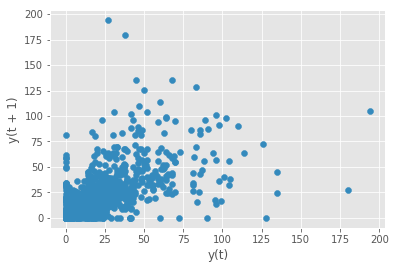

In [22]:
from pandas.plotting import lag_plot
lag_plot(dts['LUDP trading pauses'])

# Autocorrelation function

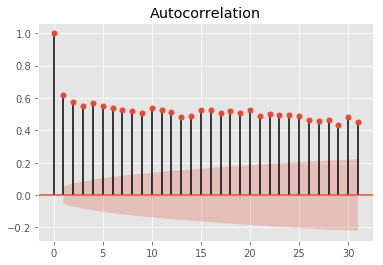

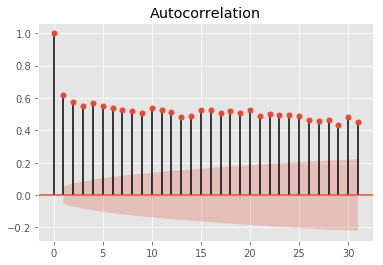

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dts['LUDP trading pauses'], lags=31)


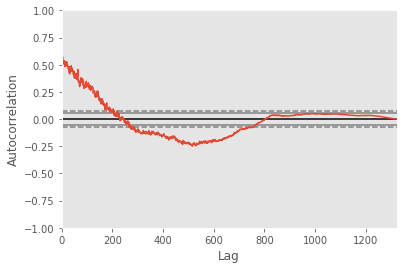

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dts['LUDP trading pauses'])

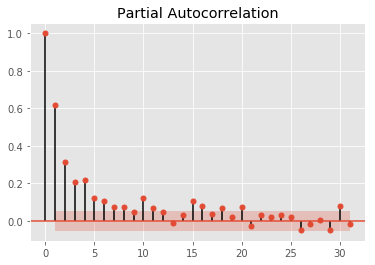

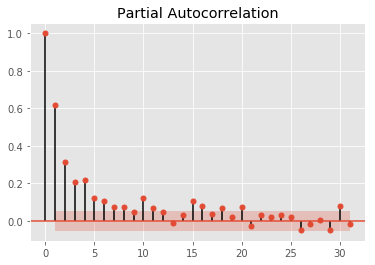

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dts['LUDP trading pauses'], lags=31)

AxesSubplot(0.125,0.125;0.775x0.755)


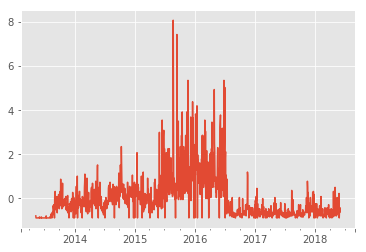

In [27]:
#'standardixe the time series'
import numpy as np
ret=(dts['LUDP trading pauses']-np.mean(dts['LUDP trading pauses']))/np.std(dts['LUDP trading pauses'])

print(ret.plot())



AxesSubplot(0.125,0.125;0.775x0.755)


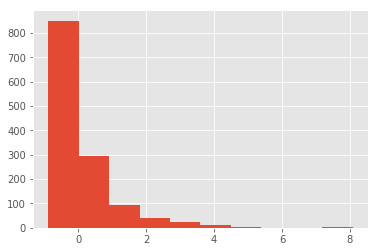

In [28]:
print(ret.hist())

In [29]:
from arch import arch_model
am = arch_model(ret)
res = am.fit()
res

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1551.3960399246262
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1359.5914631632934
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1332.609390014819
Iteration:      4,   Func. Count:     33,   Neg. LLF: 1288.9955370424764
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1278.1965627364682
Iteration:      6,   Func. Count:     48,   Neg. LLF: 1260.5171629188876
Iteration:      7,   Func. Count:     55,   Neg. LLF: 1249.6735332087671
Iteration:      8,   Func. Count:     62,   Neg. LLF: 1244.023063523951
Iteration:      9,   Func. Count:     69,   Neg. LLF: 1242.3242003811151
Iteration:     10,   Func. Count:     76,   Neg. LLF: 1240.4332704094054
Iteration:     11,   Func. Count:     82,   Neg. LLF: 1235.491914113197
Iteration:     12,   Func. Count:     89,   Neg. LLF: 1235.2310886243877
Iteration:     13,   Func. Count:     95,   Neg. LLF: 1235.1520380141205
Iteration:     14,   Func. Count:    101,   Neg. LLF: 

                      Constant Mean - GARCH Model Results                      
Dep. Variable:     LUDP trading pauses   R-squared:                      -0.350
Mean Model:              Constant Mean   Adj. R-squared:                 -0.350
Vol Model:                       GARCH   Log-Likelihood:               -1235.13
Distribution:                   Normal   AIC:                           2478.26
Method:             Maximum Likelihood   BIC:                           2499.00
                                         No. Observations:                 1321
Date:                 Tue, Oct 23 2018   Df Residuals:                     1317
Time:                         20:19:23   Df Model:                            4
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.5917  2.500e-02    -23.667 7.815e-124 [ -0.6

In [30]:
am = arch_model(ret, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:     LUDP trading pauses   R-squared:                      -0.342
Mean Model:              Constant Mean   Adj. R-squared:                 -0.342
Vol Model:                   GJR-GARCH   Log-Likelihood:               -1217.02
Distribution:                   Normal   AIC:                           2444.05
Method:             Maximum Likelihood   BIC:                           2469.98
                                         No. Observations:                 1321
Date:                 Tue, Oct 23 2018   Df Residuals:                     1316
Time:                         20:19:23   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.5852  2.264e-02    -25.842 2.968e-147 [ -0.6

In [33]:
am = arch_model(ret, p=1, o=1, q=1, power=1.0)
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     50,   Neg. LLF: 1203.6132053676847
Iteration:     10,   Func. Count:     94,   Neg. LLF: 1199.5255753715319
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1199.3660737372422
            Iterations: 14
            Function evaluations: 122
            Gradient evaluations: 14
                   Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:     LUDP trading pauses   R-squared:                      -0.341
Mean Model:              Constant Mean   Adj. R-squared:                 -0.341
Vol Model:                 TARCH/ZARCH   Log-Likelihood:               -1199.37
Distribution:                   Normal   AIC:                           2408.73
Method:             Maximum Likelihood   BIC:                           2434.66
                                         No. Observations:                 1321
Date:                 Tue, Oct 23 2018   Df Residuals:                     1316
Ti

In [ ]:
'''db = wrds.Connection()
vard=list(db.describe_table(library="crsp", table="dsf").name)
",".join(vard)
data1 = db.raw_sql("select cusip,permno,permco,issuno,hexcd,hsiccd,date,bidlo,askhi,prc,vol,ret,bid,ask,shrout,cfacpr,cfacshr,openprc,numtrd,retx from crsp.dsf where permno in (11866, 11884, 11929, 10725, 75259, 11911, 75568, 11918, 11953, 10574, 75261, 78662, 11921, 11935, 10359, 11859, 11881, 11882, 10184, 11858, 11913, 11896, 11958, 75262, 11960, 11863, 11900, 11959, 75570, 11853, 11905, 75577, 10360, 11920, 11942, 75288, 10677, 75569, 75576, 11477, 75291, 10967, 75308, 75278, 11051, 11872, 11004, 75315, 75283, 11057, 10897, 75320, 75294, 11939, 10457, 75318, 75319, 75286, 11868, 11927, 75316, 10476, 10923, 75571, 11925, 11849, 11928, 11879, 11951, 75573, 10011, 11899, 11955, 11964, 11871, 11888, 11071, 11917, 11619, 11865, 75310, 11081, 11857, 11876, 11904, 12139, 11936, 75295, 11106, 12073, 75333, 75335, 12062, 11998, 12013, 11977, 12118, 12193, 12120, 75356, 12273, 12099, 11970, 75328, 12127, 75332, 12149, 11991, 75358, 12016, 12147, 12156, 12200, 12055, 12086, 75326, 12041, 12050, 12063, 12067, 11976, 12195, 12091, 12102, 75327, 12094, 12019, 12031, 11987, 12284, 12004, 75348, 12126, 12048, 11975, 75397, 12119, 75585, 12259, 12130, 12211, 75422, 12164, 12281, 12223, 12115, 12265, 12201, 12226, 12231, 12260, 12186, -99, 75583, 75418, 75431, 12276, 12214, 75383, 12224, 12208, 12157, -99, 12150, 12174, 12172, 12202, 75664, 12268, 12238, 12285, -99, 12189, 12165, 12190, 12131, 12161, 12198, 12135, 12182, 75445, 75680, 75444, 75683, 75434, 75684, 75688, 75689, 75437, 75454, 75448, 75447, 75693, 75450, 75696, 75697, 75698, 75699, 75701, 75702, 75711, 75722, 78699, 75736, 75734, 75728, 75730, 75483, 75485, 75739, 75478, 75487, 75488, 75743, 75745, 75617, 75748, 75489, 75750, 75752, 75614, 75754, 75634, 75627, 75615, 75756, 75757, 75758, 75760, 75762, 75761, 75624, 75635, 79410, 75622, 75766, 75772, 75625, 75592, 75591, 75603, 75593, 75777, 75596, 75597, 75780, 75602, 75781, 75606, 75782, 75607, 75608, 75609, 75786, 75954, 75823, -99, 75801, 75651, 75962, 75654, 76070, 75655, 75966, 75659, 75657, 75645, 75660, 78711, 75643, 75792, 75794, 75795, 75793, 75796, 75972, 75790, 75798, 75976, 75800, 75977, 75815, 75980, 75818, 75984, 78717, 75819, 75808, 75828, 75820, 75991, -99, 75821, 75822, 76000, 75918, 75825, 75831, 76002, 75832, 75833, 76005, 75873, 75834, 75835, 75933, 76013, 75844, 75851, 76016, 75850, 75852, 75853, 75854, 76020, 76023, 76027, 76021, 76029, 75857, 75858, 75860, 75859, 76077, 76035, 75848, 75861, 75862, 76037, 76038, 76072, 75865, 75866, 76043, 75913, 75889, 75912, 75903, 75908, 75888, 75891, 75880, 75899, 75905, 75881, 75906, 75907, 76052, 75886, 75902, 75909, 76062, 75904, 75910, 76066, 76315, 75925, 76309, 76215, 75929, 76216, 76445, 75930, 75931, 76371, 76075, 76082, 75849, 76463, 76085, 78724, 76076, 76080, 76318, 76088, 76095, 76096, 76098, 76097, 76374, 76122, 76099, 76101, 76142, 76390, 76104, 76105, 76106, 76397, 76110, 76116, 76391, 76111, 76373, 76127, 76131, 76132, 76387, 76271, 76148, 76162, 76336, 76133, 76134, 76135, 76138, 76139, 76146, 76140, 76149, 76150, 76317, 76434, 76141, 76295, 76165, 76168, 76166, 76167, 76290, 76280, 76383, 76169, 76170, 76327, 76353, 76174, 76173, 76175, 76186, 76179, 76176, 76195, 76193, 76194, 76199, 76200, 76201, 76367, 76219, 76355, 76205, 76206, 76207, 76224, 76211, 76212, 76267, 76213, 76214, 76208, 76217, 76269, 76460, 76248, 76222, 78734, 76330, 76229, 76227, 76228, 76223, 76461, 76240, 76230, 76231, 76245, 76457, 76247, 76232, 76235, 76418, 76253, 76421, 76272, 76256, 76408, 76342, 76320, 76257, 76258, 76259, 76429, 76261, 76281, 76354, 76265, 76262, 76349, 76286, 76278, 76430, 76279, 76475, 76472, 76531, 76529, 76980, 76546, 76549, 76548, 76547, 76539, 76543, 76505, 76507, 76933, 76554, 76557, 76910, 76565, 76957, 76879, 76566, 76568, 76577, 76578, 76579, 76580, 76582, 76593, 76584, 76598, 76984, 76990, 76585, 76880, 76586, 76587, 76596, 76588, 76589, 76605, 76613, 76614, 76860, 76615, 76617, 76609, 76619, 76618, 76620, 76978, 76855, 76621, 76622, 76607, 76623, 76624, 76625, 76916, 76856, 76626, 76627, 76628, 76895, 76651, 76630, 76635, 76652, 76653, 76654, 76656, 76837, 76657, 76658, 77010, 76659, 76988, 76637, 76638, 76671, 76660, 76981, 76646, 76661, 76640, 76905, 76664, 76662, 76667, 76665, 76666, 76891, 76669, 76685, 76683, 76689, 76686, 76687, 76688, 76691, 76695, 76692, 76693, 76673, 76884, 76696, 76697, 76698, 76801, 76699, 76700, 76701, 76702, 76703, 76859, 76705, 76707, 76704, 76706, 76708, 76709, 76711, 76676, 76712, 76934, 76677, 76715, 76713, 76714, 76716, 76717, 76718, 76720, 76721, 76678, 76723, 76722, 77007, 76730, 76836, 76757, 76758, 76967, 76734, 76731, 76732, 76733, 76759, 76736, 76737, 76710, 76738, 76871, 76763, 76739, 76740, 76762, 76741, 76886, 76742, 76747, 76745, 76748, 76768, 76744, 76746, 76749, 76976, 76750, 76752, 76764, 76754, 76755, 76753, 76774, 76772, 76803, 76773, 76776, 76908, 76804, 76779, 76780, 76782, 76777, 76945, 76781, 76783, 76784, 76791, 76785, 76975, 76902, 76977, 76926, 76788, 76942, 76790, 76792, 76793, 76935, 76795, 76796, 76797, 76798, 76806, 76948, 76838, 76995, 76943, 76840, 76996, 76841, 77144, 76828, 76842, 76843, 76844, 76829, 76845, 76846, 76851, 76847, 76848, 76852, 76968, 38520, 76952, 77047, 77204, 77038, 77081, 77035, 77248, 77055, 77077, 77028, 77032, 77042, 77045, 77020, 77023, 77025, 77034, 77074, 77056, 77075, 77040, 77043, 77049, 77080, 77226, 77206, 77229, 77063, 77039, 77235, 77197, 77022, 77062, 77037, 77052, 77024, 77026, 77030, 77036, 77044, 77021, 77064, 77242, 77061, 77029, 77046, 77027, 77086, 77108, 77096, 77083, 77212, 77107, 77110, 77089, 77099, 77109, 77250, 77085, 77118, 77098, 77117, 77092, 77111, 77207, 77214, 77218, 77219, 77119, 77230, 77090, 77208, 77120, 77082, 77095, 77122, 77103, 77100, 77106, 77087, 77088, 77102, 77104, 77112, 77097, 77123, 77094, 77091, 77113, 77114, 77162, 77163, 77165, 77210, 77217, 77223, 77167, 77237, 77224, 77168, 77169, 77215, 77175, 77170, 77171, 77157, 77173, 77174, 77151, 77177, 77238, 77176, 77222, 77178, 77182, 77198, 77179, 77180, 77191, 77185, 77150, 77183, 77184, 86106, 77186, 77187, 77159, 77188, 77189, 77257, 77259, 77260, 77261, 77262, 77264, 77265, 77266, 77289, 77267, 77268, 77269, 77272, 77270, 77271, 77279, 77273, 77274, 77275, 77276, 77277, 77278, 77282, 77280, 77281, 77283, 77284, 77291, 77285, 77292, 77286, 77288, 77304, 77373, 77296, 77477, 77294, 77303, 10343, 77297, 77298, 77300, 77320, 77321, 77322, 77324, 77325, 77307, 77323, 77326, 77329, 77327, 77330, 77335, 77331, 77333, 77338, 77334, 77339, 77310, 77318, 77312, 77340, 77336, 77337, 77344, 77341, 77347, 77348, 77352, 77491, 77354, 77353, 77372, 77368, 77358, 77370, 77356, 77371, 77357, 77366, 77369, 77362, 77360, 77380, 77383, 77456, 77382, 77387, 77453, 77384, 77385, 77393, 78751, 77388, 77389, 77390, 77392, 77452, 77397, 77396, 77398, 77403, 77401, 77461, 77457, 77481, 77405, 77406, 77409, 77407, 77475, 77416, 77411, 77413, 77420, 77422, 77417, 77418, 77426, 77465, 77419, 77421, 77423, 77424, 77425, 77427, 77428, 77434, 77435, 77473, 77437, 77438, 77440, 77442, 77441, 77472, 77443, 77444, 77446, 77451, 77478, 77494, 77476, 77447, 77448, 77495, 77450, 77496, 77497, 77499, 77501, 77502, 77503, 77505, 77544, 77508, 77546, 77509, 77513, 77510, 77511, 77516, 77521, 77515, 77517, 77518, 77523, 77520, 77522, 78754, 77524, 77531, 77529, 77530, 77532, -99, 77534, 78756, 77536, 77550, 77538, 77537, 77539, 77540, 77541, 77542, 77543, 77741, 77572, 77575, 77574, 77635, 77584, 77577, 77580, 77583, 77581, 77579, 77582, 77587, 77593, 77588, 77595, 77596, 77599, 77602, 77597, 77600, 77610, 77601, 77613, 77603, 77612, 77648, 77614, 77605, 77616, 77617, 77606, 77608, 77619, 77620, 77622, 77624, 77621, 77634, 77630, 77628, 77629, 77632, 78759, 77649, 77637, 77652, 77723, 77653, 77654, 77655, 77659, 77740, 77663, 77657, 77660, 77661, 77662, 77664, 77667, 77668, 77669, 77672, 77673, 77670, 77644, 77675, 77676, 77678, 77679, 77685, 77687, 77695, 77688, 77684, 77697, 77698, 77705, 77699, 77701, 77714, 77702, 77708, 77710, 77770, 77757, 77771, 77763, 77777, 77767, 77773, 77774, 77814, 78766, 77784, 77815, 77785, 77786, 77787, 77781, 77793, 77794, 77803, 77795, 77796, 77801, 77811, 77821, 78772, 77823, 77824, 77831, 78775, 77830, 77833, 77856, 77832, 77858, 77837, 78777, 77836, 77838, 77841, 77847, 77844, 77839, 77840, 77843, 77845, 77846, 77848, 77851, 77852, 77859, 77864, 77876, 77829, 77861, 77863, 77866, 77867, 77862, 77865, 77868, 77870, 77872, 77887, 77888, 77883, 77892, 77900, 77899, 77901, 77902, 77912, 77913, 77919, 77917, 77926, 77920, 77929, 77930, 77924, 77927, 77932, 77967, 77968, 77969, 77971, 77972, 77978, 78140, 77976, 77977, 77979, 77982, 78027, 77995, 77984, 77985, 77987, 77988, 77989, 77992, 78010, 77993, 78780, 78000, 78003, 78001, 78024, 78018, 78019, 78006, 78184, 78007, 78008, 78009, 78021, 78023, 78022, 78025, 78015, 78026, 78039, 78033, 78032, 78034, 78041, 78042, 78038, 78043, 78050, 78055, 78051, 78054, 78053, 78062, 78065, 78069, 78066, 78070, 78074, 78073, 78078, 78091, 78168, 78081, 78083, 78082, 78085, 78098, 78102, 78846, 78101, 78105, 78104, 78112, 78786, 78177, 78179, 78210, 78924, 78145, 78787, 78200, 78198, 78788, 78189, 78155, 78789, 78180, 78176, 78202, 78215, 78214, 78194, 79033, 78192, 78203, 78113, 78139, 78172, 78197, 78217, 78150, 78796, 78137, 78170, 78207, 78804, 78208, 78211, 78134, 78146, 78156, 78201, 78795, 78148, 78152, 78193, 78161, 78209, 78213, 78157, 78843, 78835, 78851, 78812, 78818, 78826, 78816, 78825, 78838, 78831, 78815, 78864, 78860, 78839, 78813, 78820, 78863, 78859, 78828, 78836, 78817, 78913, 78899, 78901, 78928, 78912, 78894, 78907, 78908, 78877, 78890, 78891, 78905, 78872, 78895, 78879, 78875, 78881, 78889, 78897, 78934, 78876, -99, 78898, 79124, 78892, 78915, 78883, 78916, 78867, 78937, 78887, 78946, 78873, 78869, 78914, 78920, 78919, 78900, 79003, 79032, 78967, 79002, 79000, 78981, 79009, 79043, 79015, 79021, 78962, 78974, 79005, 79006, 79022, 78964, 78995, 79010, 79042, 78955, 78958, 78965, 78975, 79008, 78999, 79024, 78954, 79037, 78990, 79007, 79053, 79018, 78950, 78951, 79011, 79035, 78989, 78987, 79016, 78985, 79062, 79057, 78963, 79061, 79058, 78956, 79017, 79025, 78953, 78971, 78996, 79141, 78972, 78980, 78983, 78994, 78998, 78959, 79081, 79084, 78978, 79023, 79072, 80106, 79078, 79074, 79089, 79097, 79130, 79083, 79080, 79104, 79107, 79108, 79085, 79121, 79077, 79117, 79088, 79137, 79096, 79103, 79120, 79082, 79091, 79069, 79093, 79145, 79079, 79102, 79068, 79144, 79094, 79086, 79197, 79209, 79210, 79155, 79207, 79149, 79163, 79152, 79156, 79212, 79196, 79220, 79175, 79182, 79183, 79205, 79153, 79176, 79167, 79174, 79160, 79162, 79177, 79159, 79168, 79179, 79198, 79181, 79191, 79195, 79164, 79192, 79169, 79201, 79188, 79190, 79157, 79193, 79237, 79171, 79172, 79323, 79314, 79268, 79292, 79280, 79247, 79301, 79290, 79299, 79302, 79300, 79263, 79289, 79248, 86104, 79328, 79273, 79294, 79249, 79260, 79251, 79253, 79291, 79257, 79275, 79336, 66828, 79271, 79305, 79288, 79265, 79269, 79297, 79296, 79261, 79310, 79349, 79535, 79262, 79337, 79252, 79283, 79245, 79255, 79298, 79272, 79307, 79373, 79276, 79308, 79367, 79371, 79435, 79398, 79413, 79416, 79437, 79438, 79376, 79406, 79409, 79444, 79424, 79390, 79423, 79374, 79385, 77780, 79386, 79421, 79425, 79377, 79381, 79392, 79396, 79400, 79417, 79402, 79365, 79379, 79378, 79366, 79401, 79422, 79420, 79370, 79391, 79405, 79404, 79415, 79411, 79418, 79428, 79455, 79429, 79384, 79399, 79403, 79462, 79387, 79393, 79408, 79419, 79375, 79467, 79471, 79473, 79504, 79509, 79468, 79470, 79478, 79481, 79484, 79541, 79543, 79511, 79520, 79518, 79523, 79507, 79482, 79472, 79476, 79490, 79494, 79499, 79550, 79530, 79475, 79498, 79545, 79488, 79486, 79496, 79525, 79533, 79483, 79505, 79634, 79501, 79515, 79521, 79502, 79508, 79528, 79503, 79529, 79526, 79466, 79491, 79517, 79516, 79513, 79527, 79597, 79577, 79563, 79887, 79616, 79564, 79617, 79619, 79571, 79572, 79588, 79603, 79612, 79662, 79568, 79599, 80108, 79664, 79566, 79567, 79590, 79594, 79595, 79607, 79660, 79615, 79589, 79624, 79622, 79667, 79569, 79605, 79591, 79668, 79669, 79670, 79601, 79606, 79610, 79613, 79628, 79713, 79621, 79627, 79674, 79698, 79722, 79738, 79682, 79706, 76799, 79731, 79751, 79716, 79676, 79710, 79723, 79724, 79691, 79701, 79743, 79677, 79686, 79695, 79712, 79757, 79758, 79711, 79742, 79745, 79681, 79703, 79729, 79766, 79684, 79707, 79685, 79689, 79699, 79772, 79736, 79735, 79740, 79687, 79704, 79708, 79719, 79721, 79715, 79725, 79781, 79739, 79675, 79720, 79779, 79683, 79780, 79700, 79702, 79730, 79726, 79728, 79705, 79718, 79819, 79845, 79909, 79857, 79876, 79787, 79828, 79903, 79831, 79817, 79818, 79862, 79906, 79839, 79790, 79833, 79804, 79795, 79855, 79835, 79858, 79881, 79791, 79798, 79874, 80109, 79869, 79925, 79878, 79927, 79908, 79915, 79886, 79802, 79812, 79822, 80167, 79846, 79865, 79825, 79866, 79875, 79788, 79829, 79830, 79841, 79860, 79861, 79868, 79789, 79803, 79826, 79850, 79879, 79883, 79929, 79843, 79863, 79922, 79882, 79794, 79786, 79809, 79884, 79799, 79807, 79847, 79854, 79880, 79801, 79808, 79871, 79797, 79935, 80019, 79931, 79977, 80094, 80052, 80017, 79950, 79971, 79973, 80023, 80044, 80104, 79999, 80032, 80055, 79942, 79951, 80076, 80027, 80037, 80103, 79941, 79940, 80074, 79959, 80009, 80028, 80034, 80051, 80036, 79991, 80030, 80049, 79932, 79933, 80105, 79948, 80093, 79997, 80059, 79954, 79945, 79966, 79968, 80091, 79984, 80006, 80020, 80026, 80042, 79934, 79949, 79962, 80001, 80012, 80007, 80050, 80053, 79938, 79957, 79975, 79943, 80000, 80038, 79993, 79989, 79992, 80018, 80046, 80003, 80054, 80148, 80158, 80154, 80185, 80126, 80113, 80161, 80159, 80132, 80145, 80114, 80123, 80134, 80138, 80140, 80184, 80160, 80186, 80189, 80135, 80165, 80153, 80146, 80235, 80252, 80262, 80268, 80239, 80242, 80249, 80289, 80271, 80293, 80222, 80231, 80248, 80264, 80281, 80285, 80290, 80214, 80192, 80238, 80255, 80270, 80274, 80236, 80233, 80265, 80272, 80279, 80225, 80585, 80253, 80199, 80278, 80292, 80376, 80204, 80256, 80258, 80226, 80245, 80250, 80254, 80257, 80286, 80297, 80228, 80221, 80193, 80237, 80243, 80229, 80244, 80260, 80240, 80280, 80344, 80300, 80334, 80359, 80361, 80366, 80306, 80322, 80313, 80325, 80333, 80353, 80327, 80309, 80348, 80372, 80375, 80358, 80371, 80324, 80301, 80386, 80388, 80343, 80320, 80396, 80369, 80316, 80352, 80370, 80387, 80329, 80337, 80345, 80362, 80382, 80323, 80332, 80368, 80311, 80321, 80341, 80331, 80393, 80374, 80310, 80317, 80305, 80360, 80404, 80702, 80302, 80315, 80351, 80357, 80303, 80479, 80472, 80422, 80465, 80485, 80440, 80452, 80434, 80463, 80482, 80487, 80439, 80416, 80442, 80700, 80414, 80415, 80483, 80432, 80450, 80420, 80464, 80468, 80488, 80443, 80444, 80447, 80484, 80454, 80470, 80477, 80441, 80448, 80462, 80469, 80475, 80481, 80461, 80480, 80489, 80431, 80704, 80460, 80503, 80583, 80505, 80539, 80544, 80504, 80541, 80543, 80567, 80558, 80568, 80594, 80596, 80598, 80572, 80497, 80587, 80512, 80536, 80542, 80581, 80589, 80513, 80530, 80549, 80554, 80772, 80506, 80593, 80578, 80508, 80514, 80524, 80556, 80602, 80561, 80571, 80605, 80564, 80592, 80534, 80498, 80562, 80565, 80528, 80537, 80577, 80526, 80538, 80552, 80519, 80553, 80570, 80575, 80499, 80527, 80548, 80600, 80560, 80559, 80563, 80540, 80679, 80671, 80640, 80658, 80660, 80609, 80674, 80621, 80635, 80637, 80651, 80698, 80615, 79480, 80694, 80661, 80608, 80617, 80613, 80629, 80610, 80618, 80628, 80650, 80647, 80669, 80612, 80680, 80663, 80624, 80668, 80664, 80616, 80631, 80636, 80648, 80667, 80678, 80666, 80682, 80642, 80699, 80652, 80670, 80649, 80659, 80771, 80756, 80713, 81233, 80748, 80719, 80753, 80730, 80750, 80749, 80729, 80738, 80759, 80773, 80746, 80736, 80755, 80751, 80757, 80761, 80774, 80752, 80740, 80743, 80745, 80763, 80786, 80802, 80796, 80828, 80831, 80833, 80781, 80843, 80788, 80845, 80840, 80791, 80839, 80855, 80798, 80818, 80820, 80852, 80853, 80794, 80809, 80836, 80789, 80841, 80797, 80832, 80812, 80829, 80846, 80851, 80804, 80854, 80824, 80803, 80807, 80827, 80835, 80858, 80941, 80934, 80916, 80924, 80939, 80864, 80927, 80995, 80952, 80921, 80949, 80954, 80919, 80925, 80931, 80913, 80920, 80930, 80935, 80914, 80922, 80940, 80936, 80947, 80865, 80932, 80943, 80951, 80868, 80933, 80942, 80915, 80965, 81012, 80967, 81021, 81011, 80994, 81025, 80962, 80963, 80993, 81007, 81005, 81048, 81042, 81023, 80991, 81008, 80973, 80972, 80975, 80982, 81001, 81003, 81009, 81010, 81015, 81018, 80968, 80957, 80987, 81004, 81047, 81013, 81187, 81020, 80976, 80969, 80970, 80971, 81086, 81084, 81059, 81063, 81056, 81110, 81177, 81119, 81109, 81098, 81113, 81111, 81071, 81107, 81085, 81074, 81055, 81058, 81090, 81096, 81060, 81108, 81115, 81079, 81102, 81106, 81064, 81118, 81069, 81051, 81089, 81099, 81076, 81116, 81078, 81153, 81100, 81151, 81138, 81164, 81152, 81132, 81142, 81137, 81162, 81145, 81157, 81126, 81169, 81178, 81184, 81144, 81166, 81131, 81173, 81158, 81185, 81186, 81146, 81123, 81160, 81174, 81128, 81165, 81172, 81176, 81181, 81201, 81228, 81199, 81212, 81230, 81191, 81224, 81196, 81220, 81226, 81215, 81221, 81222, 81202, 81218, 81232, 81241, 81288, 81283, 81285, 81256, 81275, 81280, 81245, 81276, 81253, 81242, 81264, 81545, 81248, 81255, 81269, 81271, 81272, 81265, 81238, 81246, 81249, 81277, 81266, 81267, 81279, 81262, 81240, 81252, 81290, 81293, 81282, 81292, 81281, 81515, 81519, 81502, 81514, 81498, 81481, 81508, 81482, 81486, 81504, 81485, 81487, 81619, 81475, 81516, 81300, 81501, 81505, 81472, 81477, 81509, 81496, 81517, 81506, 81476, 81296, 81483, 81470, 81503, 81582, 81540, 81566, 81570, 81578, 81536, 81534, 81523, 81553, 81557, 81563, 81581, 81538, 81525, 81530, 81592, 81521, 81550, 81552, 81573, 81586, 81588, 81539, 81529, 81551, 81587, 81591, 81567, 81575, 81583, 81653, 81639, 81599, 81608, 81631, 81643, 81616, 81624, 81637, 81642, 81635, 81618, 81640, 81613, 81597, 81615, 81626, 81645, 81634, 81602, 81656, 81621, 81623, 81600, 81654, 81629, 81633, 81650, 81620, 81632, 81648, 81607, 81685, 81705, 81759, 81736, 81683, 81721, 81740, 81741, 81676, 81764, 81679, 81733, 81747, 81754, 81682, 81762, 81743, 81756, 81697, 81725, 81761, 81677, 81689, 81701, 81687, 81692, 81696, 81712, 81749, 81728, 81760, 81713, 81751, 81722, 81668, 81686, 81665, 81750, 81684, 81716, 81714, 81735, 81748, 81691, 81715, 81720, 81738, 81698, 81699, 81724, 81742, 81755, 81873, 81877, 81879, 81887, 81902, 81851, 81776, 81884, 81899, 81886, 81767, 81769, 81890, 81893, 81858, 81888, 81784, 81862, 81871, 81872, 81897, 81906, 81907, 81878, 81883, 81895, 81882, 81901, 81859, 81898, 81894, 81778, 83728, 81849, 81850, 81854, 81864, 81869, 81903, 81866, 81874, 81891, 82183, 82225, 82216, 82214, 82204, 82202, 82209, 82221, 82205, 82206, 82155, 81914, 82188, 82192, 82195, 81922, 82186, 82218, 82222, 82156, 82200, 82228, 82161, 81920, 82210, 81925, 82223, 82157, 82170, 82177, 82226, 82219, 82159, 82163, 82172, 82185, 82199, 81912, 82160, 82194, 82201, 82212, 82282, 82227, 82193, 82176, 82191, 82173, 82178, 82190, 82207, 82164, 82168, 82167, 82234, 82286, 82253, 82276, 82252, 82281, 82268, 82272, 82237, 82278, 82656, 82275, 82285, 82250, 82261, 82266, 82235, 82283, 82290, 82238, 82247, 82243, 82287, 82249, 82255, 82256, 82258, 82259, 82265, 82291, 82494, 82267, 82280, 82303, 82481, 82491, 82488, 82492, 82504, 82508, 82533, 82539, 82511, 82535, 82536, 82522, 82471, 82292, 82295, 82308, 82298, 82485, 82490, 84005, 82495, 82512, 82515, 82526, 82476, 82470, 82518, 82520, 82505, 82507, 82474, 82528, 82467, 82527, 82530, 82538, 82493, 82487, 82482, 82521, 82472, 82300, 82501, 82301, 82513, 82299, 82489, 82466, 82306, 82484, 82510, 82537, 82524, 82534, 82655, 82657, 82307, 83186, 82640, 82559, 82567, 82562, 82581, 82621, 82551, 82603, 82627, 82608, 82610, 82622, 82566, 82618, 82576, 82579, 82584, 82594, 82568, 82574, 82593, 82597, 82620, 82623, 82544, 82552, 82588, 82550, 82643, 82591, 82549, 82546, 82564, 82605, 82558, 82642, 82572, 82583, 82612, 82651, 82547, 84181, 82565, 82602, 82613, 82615, 82616, 82614, 82634, 82557, 82638, 82639, 82600, 82644, 82595, 82548, 82632, 82635, 82587, 82590, 82598, 82604, 82619, 82626, 82628, 82577, 82607, 82554, 82560, 82606, 82697, 82719, 82599, 82732, 82740, 82762, 82673, 82724, 82672, 82707, 82734, 82738, 82754, 82761, 82669, 82711, 82716, 82720, 82723, 82744, 82683, 82729, 82686, 82663, 82688, 82759, 82667, 82703, 83135, 82715, 82727, 82722, 82736, 82769, 82770, 82751, 82710, 82717, 82726, 82749, 82745, 82746, 82670, 82768, 82679, 82695, 82700, 82704, 82777, 82741, 82753, 82755, 82767, 82783, 82664, 82675, 82760, 82766, 82701, 82730, 82757, 82693, 82702, 82706, 82666, 82685, 82681, 82687, 82691, 82696, 82698, 82578, 82739, 82747, 82713, 82709, 82758, 82682, 82845, 82808, 82840, 82841, 82821, 82833, 82835, 82810, 82818, 82824, 82827, 82839, 82837, 82851, 82831, 82803, 82832, 82807, 83121, 82853, 83143, 82858, 83180, 83125, 83123, 83146, 83152, 83159, 83163, 83179, 83182, 83165, 83113, 83130, 83172, 83106, 83131, 83160, 83162, 83183, 83136, 83137, 83175, 83127, 82791, 83161, 82861, 85409, 83184, 83157, 83132, 83150, 83122, 83133, 83148, 83154, 83181, 83185, 83128, 83151, 83167, 83178, 83119, 83129, 83138, 83145, 83141, 83120, 83147, 82857, 83176, 83156, 83168, 83174, 83173, 83111, 83124, 83134, 83144, 83164, 82859, 83140, 83293, 83303, 82860, 83191, 83298, 83246, 83253, 83271, 83307, 83269, 83279, 83251, 83229, 83318, 83193, 83263, 83232, 83324, 83294, 83308, 83317, 83270, 83272, 83276, 83274, 83291, 83306, 83275, 83278, 83283, 83242, 83256, 83258, 83266, 83310, 83231, 83254, 83285, 83234, 83235, 83247, 83259, 83204, 83277, 83316, 83286, 83322, 83280, 83190, 83284, 83295, 83313, 83299, 83314, 83304, 83238, 83262, 83267, 83297, 83230, 83244, 83309, 83320, 83241, 83378, 83392, 83357, 83360, 83390, 83397, 83416, 83436, 83351, 83370, 83431, 83381, 83332, 83413, 83365, 83401, 83346, 83407, 83359, 83355, 83412, 77610, 83430, 83435, 83349, 83343, 83428, 83389, 83421, 83368, 83367, 83391, 83403, 83423, 83340, 83366, 83341, 83358, 83383, 83415, 83400, 83348, 83354, 83362, 83379, 83395, 83386, 83418, 83382, 83405, 83422, 83388, 83404, 83429, 83426, 83473, 83482, 83485, 83514, 83553, 83480, 83497, 83520, 83525, 83526, 83580, 83518, 83531, 83440, 83524, 83542, 83582, 83487, 83499, 83509, 83453, 83446, 83496, 83541, 83457, 83555, 83567, 83479, 83447, 83507, 83516, 83569, 83576, 83508, 83570, 83523, 83528, 83527, 83578, 83470, 83449, 83561, 83465, 83466, 83493, 83506, 83538, 83547, 83568, 83574, 83515, 83546, 83464, 83490, 83491, 83459, 83439, 83475, 83495, 83498, 83512, 83539, 83581, 83452, 83565, 83534, 83535, 83557, 83471, 83489, 83573, 83550, 76209, 83537, 83467, 83503, 83519, 83549, 83560, 83575, 83500, 83559, 83558, 83685, 83699, 83623, 83660, 83688, 83707, 83616, 83666, 83690, 83658, 83612, 83632, 83674, 83709, 83651, 83598, 84009, 83645, 83657, 83649, 83650, 83605, 83681, 83611, 83615, 83664, 83704, 83703, 83625, 83637, 83706, 83626, 83633, 83594, 83648, 83655, 83603, 83621, 83622, 83638, 83669, 83606, 83609, 83700, 83705, 83629, 83630, 83653, 83689, 83692, 83661, 83662, 83670, 83676, 83680, 83608, 83654, 84400, 83667, 83588, 83635, 83665, 83678, 83639, 83595, 83597, 83677, 83686, 83693, 83694, 83696, 83702, 83613, 83618, 83733, 83719, 83744, 83740, 83781, 83785, 83746, 83766, 83801, 83778, 83732, 83805, 83750, 83809, 83793, 83737, 83722, 83789, 83784, 83769, 83810, 83768, 83779, 83800, 83808, 83735, 83743, 83720, 83780, 83721, 83753, 83794, 83776, 83803, 83747, 83731, 83751, 83777, 83790, 83799, 83736, 83807, 83851, 83758, 83756, 83797, 83788, 83878, 83795, 83916, 83865, 83866, 83879, 83832, 83849, 83830, 83816, 83902, 83912, 83840, 83822, 84003, 83856, 83870, 83828, 83899, 83908, 83915, 83917, 83844, 83823, 83873, 83825, 83911, 83874, 83887, 83892, 83838, 83820, 83861, 83829, 83836, 83852, 83857, 83860, 83883, 83819, 83877, 83901, 83834, 83850, 83862, 83900, 83843, 83818, 83897, 83910, 83884, 83906, 83890, 83853, 83869, 83933, 83921, 83929, 83957, 83928, 83941, 83958, 83962, 84000, 83969, 83918, 83981, 83991, 83931, 83966, 83983, 83939, 83979, 83998, 83976, 83922, 83948, 83932, 83990, 83940, 83944, 84007, 83956, 83961, 83967, 83920, 83925, 83943, 83950, 83960, 83965, 83999, 84001, 83971, 83982, 83937, 83942, 83945, 83946, 83947, 83953, 84008, 84047, 84121, 84074, 84064, 84127, 84065, 84099, 84045, 84023, 84026, 84089, 84119, 84117, 84103, 84027, 84046, 84062, 84028, 84094, 84096, 84110, 84130, 84128, 84084, 84120, 84133, 84135, 84078, 84087, 84097, 84036, 84040, 84148, 84151, 84018, 84101, 84052, 84071, 84106, 84105, 84134, 84136, 84066, 84147, 84150, 84061, 84108, 84098, 84039, 84125, 84043, 84086, 84113, 84050, 84111, 84068, 84085, 84126, 84042, 84077, 84092, 84107, 84118, 84034, 84132, 84142, 84141, 84144, 84055, 84060, 84080, 84091, 84093, 84124, 84139, 84041, 84076, 84088, 84032, 84054, 84025, 84090, 84154, 84057, 84024, 84070, 84075, 84031, 84146, 84056, 84164, 84168, 84179, 84175, 84252, 84279, 84187, 84227, 84242, 84246, 84259, 84275, 84282, 84285, 84226, 84255, 84191, 84192, 84202, 84258, 84271, 84221, 84238, 84186, 84222, 84247, 84182, 84219, 84280, 84248, 84197, 84231, 84243, 84189, -99, 84250, 84170, 84263, 84234, 84274, 84165, 84214, 84251, 84257, 84269, 84266, 85668, 84235, 84281, 84213, 84174, 84224, 12928, 84230, 84172, 84240, 84253, 84262, 84264, 84159, 84201, 84217, 84198, 84169, 84229, 84208, 84210, 84167, 84216, 84267, 84277, 84283, 84318, -99, 84348, 84329, 84344, 84350, 84325, 84330, 84304, 84341, 84286, 20598, 84371, 84333, 84311, 84349, 84308, 84342, 84347, 84352, 84312, 84343, 84291, 84302, 84339, 84294, 84310, 84320, 84327, 84374, 84288, 84289, 84361, 84296, 84317, 84319, 84321, 84301, 84324, 84351, 84337, 84309, 84438, 84407, 84422, 84424, 84418, 84412, 84419, 84436, 84441, 84394, 84385, 84406, 84416, 84414, 84427, 84426, 84428, 84430, 84434, 84395, 84440, 84413, 84420, 84391, 84429, 84396, 84415, 84531, 84421, 84552, 84559, 84588, 84511, 84577, 84589, 84525, 84556, 84570, 84592, 84566, 84562, 84519, 84535, 84536, 84583, 84517, 84553, 84578, 84539, 84514, 84513, 84523, 84572, 84560, 84561, 84569, 84509, 84537, 84563, 84545, 84757, 88745, 84549, 84565, 84510, 84573, 84543, 84546, 84555, 84587, 84526, 84530, 84564, 84551, 84534, 84568, 84580, 84550, 84597, 84594, 84649, 84638, 84599, 84644, 84607, 84606, 84598, 84620, 84645, 84631, 84632, 84624, 84628, 84616, 84625, 84601, 84600, 84605, 84612, 84613, 84626, 84627, 84609, 84604, 84640, 84650, 84651, 84617, 84595, 84737, 84752, 84731, 84747, 84755, 84746, 84758, 84721, 84763, 84718, 84761, 84720, 84728, 84729, 84662, 84753, 84730, 85722, 84663, 84722, 84744, 84741, 84800, 84734, 84785, 84793, 84802, 84818, 84810, 84815, 84779, 84792, 84780, 84791, 84790, 84827, 84788, 84805, 84776, 84817, 84816, 84778, 84811, 84819, 84821, 84830, 84771, 84797, 84796, 84801, 84789, 84823, 84768, 85035, 85023, 85071, 85005, 85031, 85075, 85037, 85014, 85080, 85004, 85012, 85018, 85030, 85072, 85034, 85015, 85067, 85027, 85043, 85051, 85010, 85028, 85045, 85013, 85055, 85001, 85026, 85040, 85077, 84997, 85011, 85021, 85048, 85038, 85069, 85029, 85063, 85032, 84998, 85020, 85044, 85078, 85046, 85025, 85042, 85016, 85065, 85036, 84999, 85059, 85240, 85187, 85249, 85210, 85168, 85175, 85191, 85208, 85212, 85218, 85177, 85174, 85173, 85203, 85219, 85225, 85184, 85158, 85162, 85242, 85227, 85215, 85157, 85245, 85247, 85160, 85241, 85198, 85246, 85193, 85214, 85180, 85206, 85217, 85163, 85190, 85197, 85216, 85171, 85239, 85213, 85165, 85182, 85196, 85166, 85159, 85408, 85188, 85224, 85223, 85278, 85277, 85292, 85304, 85286, 85280, 85311, 85313, 85314, 85291, 85293, 85261, 85320, 85297, 85306, 85326, 85315, 85290, 85276, 85319, 85307, 85318, 85272, 85284, 85296, 85323, 85300, 85258, 85312, 85289, 85268, 85281, 85309, 85310, 85302, 85298, 85273, 85288, 85366, 85351, 85400, 85363, 85382, 85333, 85372, 85344, 85390, 85365, 85378, 85405, 85379, 85393, 85373, 88449, 85331, 85361, 85371, 85336, 85380, 85347, 85352, 85357, 85354, 85397, 85402, 85350, 85353, 85356, 85395, 85389, 85385, 85388, 85355, 85334, 85360, 85465, 85429, 85486, 85516, 85501, 85463, 85488, 85436, 85504, 85437, 85462, 85502, 85475, 85477, 85480, 85511, 85411, 85499, 85452, 85505, 85670, 85498, 85476, 85482, 85440, 85508, 85459, 85458, 85432, 85478, 85483, 85484, 85493, 85509, 85500, 85518, 85415, 85424, 85474, 86441, 85514, 85449, 85473, 85492, 85489, 85495, 85456, 85464, 85481, 85479, 85512, 85427, 85515, 85454, 85419, 85466, 85510, 85507, 85513, 85496, 85597, 85598, 85533, 85541, 85588, 85584, 85590, 85528, 85540, 85600, 85557, 85562, 85596, 85606, 85568, 85578, 85531, 85627, 85566, 85599, 85556, 85620, 85611, 85612, 85621, 85579, 85582, 85539, 85548, 85561, 85546, 85613, 85622, 85626, 85560, 85574, 85571, 85524, 85538, 85603, 85542, 85567, 85573, 85625, 85593, 85521, 85549, 85555, 85609, 85576, 85581, 85632, 85526, 85544, 85553, 85563, 85536, 85575, 85629, 85633, 85522, 85550, 85610, 85618, -99, 85577, 85589, 85564, 85565, 85718, 85702, 85696, 85701, 85691, 85700, 85707, 85719, 86210, 85698, 85662, 85690, 85715, 85688, 85689, 85710, 85684, 85683, 85647, 85713, 85646, 85697, 85695, 85716, 85655, 85704, 85663, 85641, 85709, 85653, 85727, 85733, 85775, 85776, 85768, 85724, 85742, 85732, 85769, 85738, 85739, 85755, 85753, 85758, 85803, 85853, 85805, 85827, 85828, 85835, 85844, 85855, 85812, 85854, 85800, 85818, 85799, 85814, 85808, 85813, 85786, 85933, 85852, 85804, 85781, 0, 85802, 85782, 85807, 85831, 85836, 85792, 85841, 85801, 85822, 85850, 85796, 85791, 85817, 85816, 85839, 85825, 85832, 85815, 85846, 85847, 85811, 85849, 85886, 85889, 85894, 85892, 85931, 85903, 85880, 85921, 85925, 85902, 85859, 85900, 85865, 85882, 85924, 85862, 85867, 85871, 85872, 85878, 85881, 85887, 85864, 85870, 85866, 85868, 85879, 85923, 85901, 85919, 85863, 85977, 85987, 85986, 86000, 85944, 85984, 85951, 85939, 85960, 85967, 85958, 85952, 85976, 85988, 85995, 85985, 85959, 85964, 85963, 85990, 85969, 85972, 85946, 85992, 85971, 86006, 85975, 85989, 85993, 85962, 85998, 85956, 85979, 86047, 86054, 86018, 85955, 86085, 86093, 86070, 86058, 86073, 86049, 86061, 86065, 86037, 86057, 86062, 86077, 86034, 86096, 86017, 86082, 86041, 86102, 86063, 86094, 86066, 0, 86071, 86039, 86067, 86021, 86088, 86083, 86051, 86055, 86028, 86060, 86025, 86043, 86097, 86010, 86092, 89521, 86045, 86048, 86089, 86030, 86149, 86196, 86128, 86153, 86125, 86185, 86173, 86123, 86164, 86189, 86156, 86120, 86179, 86211, 86182, 86198, 86209, 86213, 86215, 86207, 86170, 86150, 86137, 86121, 86166, 86142, 86193, 86157, 86187, 86186, 86144, 86158, 86174, 86140, 86171, 86172, 86133, 86151, 86199, 86188, 86139, 86112, 86176, 86195, 86146, 86155, 86115, 86178, 86180, 86238, 86252, 86228, 86288, 86235, 86254, 86267, 86234, 87131, 86237, 86251, 86285, 86219, 86227, 86298, 86241, 86236, 86250, 86224, 86301, 86248, 86274, 86284, 86287, 86233, 86258, 86244, 86249, 86260, 86223, 86262, 86272, 86259, 86266, 86257, 86261, 86265, 86289, 86296, 86246, 86281, 86283, 86297, 86256, 86225, 86270, 86340, 86334, 86323, 86307, 86309, 86328, 86332, 86342, 86322, 86330, 86305, 86338, 86326, 86324, 86339, 86337, 86316, 86310, 86315, 86356, 86352, 86387, 86368, 0, 86435, 86425, 86401, 86411, 86432, 34937, 86424, 34936, 86436, 86429, 89858, 86421, 86434, 86417, 86540, 0, 86542, 86514, 86534, 86489, 86498, 86445, 86519, 86487, 86512, 86501, 86516, 86515, 86544, 86532, 86525, 86541, 86531, 86520, 90588, 86579, 86569, 86580, 86565, 89143, 86547, 86560, 86586, 86567, 86577, 86585, 86726, 86602, 86709, 86715, 86590, 86591, 0, 86595, 86727, 86731, 86740, 86593, 86721, 86594, 86733, 86738, 86713, 91608, 86723, 86729, 86735, 86710, 86717, 86742, 86739, 86741, 86720, 86718, 86724, 86732, 86725, 86748, 86780, 86794, 86784, 88941, 86774, 86775, 86779, 0, 86777, 86769, 86766, 86795, 86782, 86763, 86790, 86768, 86778, 86783, 86756, 86762, 86840, 86522, 86862, 86839, 86822, 86802, 86843, 86810, 86848, 86849, 86847, 86835, 86844, 86813, 86809, 86850, 86841, 86828, 86858, 86866, 86815, 86819, 86833, 86831, 86832, 86838, 86863, 86829, 86842, 86827, 86830, 86836, 86860, 86816, 86799, 86868, 86893, 86903, 86884, 86888, 86905, 86913, 86916, 86918, 86932, 86877, 86902, 86904, 86900, 86924, 86883, 86926, 86876, 86931, 86885, 86887, 86895, 86928, 86878, 86907, 86914, 86934, 86908, 86891, 86879, 86882, 86922, 86886, 86892, 86906, 86935, 86881, 86921, 86867, 86898, 86912, 86920, 86915, 86930, 86890, 86897, 86910, 86936, 86919, 86929, 86956, 87017, 87011, 86974, 86964, 86972, 87018, 86988, 87009, 86954, 86980, 86937, 86959, 86982, 86949, 86993, 87010, 86990, 86981, 86967, 86955, 87015, 86996, 86953, 86983, 86997, 87006, 87007, 86968, 86999, 86952, 87013, 86986, 86994, 86995, 87002, 86958, 86969, 86975, 86989, 87001, 86950, 86965, 86977, 86979, 86966, 86991, 87000, 86998, 86961, 87008, 86978, 87019, 87021, 87022, 87023, 86985, 87016, 87020, 0, 87100, 87102, 87103, 87126, 87121, 87049, 87088, 87073, 87072, 87076, 87077, 87093, 87129, 87061, 87041, 87092, 87065, 87066, 87087, 87051, 87085, 87104, 87122, 87099, 87101, 87106, 87108, 87031, 87110, 87109, 87115, 87089, 87123, 87074, 87091, 87095, 87078, 87056, 87075, 87096, 87058, 87068, 87111, 87124, 87027, 87060, 87105, 87107, 87034, 87116, 87118, 87052, 87059, 87062, 87083, 87081, 87086, 87050, 87057, 87036, 87082, 87097, 87162, 87157, 87187, 87139, 87183, 87165, 87174, 87181, 87159, 87171, 87167, 87168, 87189, 87160, 87191, 87134, 87158, 87166, 87169, 87175, 87184, 87155, 87161, 87179, 87182, 87150, 87198, 87197, 87180, 87178, 87193, 87153, 87164, 87140, 87173, 87176, 87172, 87156, 87195, 87249, 87232, 87244, 87260, 87259, 87265, 87228, 87234, 87241, 87222, 87225, 87264, 87258, 87221, 87220, 87224, 87240, 87261, 87239, 87227, 87237, 87242, 87212, 87248, 87229, 87230, 87238, 87246, 87226, 87247, 87254, 87219, 87236, 87243, 87216, 87251, 87253, 87256, 87255, 87314, 87358, 87267, 87313, 87233, 87353, 87295, 87301, 87357, 87304, 87345, 87309, 87316, 87284, 87336, 87347, 87293, 87323, 87326, 87327, 87367, 87350, 87319, 87331, 87355, 87334, 87325, 87360, 87335, 87364, 87341, 87365, 87312, 87277, 87361, 87351, 87344, 87356, 87302, 87310, 87328, 87298, 87306, 87332, 87333, 87343, 87317, 90358, 87359, 87329, 87338, 87352, 87315, 87363, 87342, 87349, 87300, 87321, 87337, 87299, 87305, 87307, 87376, 87407, 87422, 87380, 87379, 87428, 87430, 87378, 87395, 87383, 87388, 87403, 87455, 87447, 87375, 87450, 87419, 87392, 87390, 87416, 87457, 87382, 87394, 87454, 87415, 87411, 87427, 87432, 87373, 87452, 87400, 87414, 87412, 87429, 87393, 87377, 87439, 87401, 87418, 87431, 87396, 87399, 87420, 87384, 87385, 87391, 87424, 87423, 87456, 87406, 87409, 87417, 87496, 87504, 87482, 87500, 87510, 87494, 87474, 87480, 87484, 87491, 87473, 87475, 87490, 87507, 87527, 87495, 87502, 87513, 87498, 87483, 87497, 87489, 87503, 87468, 87487, 87516, 87492, 87526, 87521, 87478, 87523, 87465, 87517, 87518, 87557, 87486, 87499, 87515, 87479, 87509, 87574, 87564, 87561, 87572, 87536, 87576, 87569, 87571, 87539, 87541, 87559, 87563, 87568, 87562, 87610, 87655, 87632, 87630, 87634, 87638, 87595, 87585, 87583, 87588, 87598, 87618, 87639, 87603, 87605, 87647, 87604, 87591, 87830, 87615, 87640, 87597, 87650, 87624, 87646, 87648, 87606, 87616, 87617, 87654, 87625, 87644, 87589, 87607, 87642, 87601, 87633, 87631, 87649, 87613, 87636, 87641, 87643, 87590, 87596, 87651, 87609, 87586, 87608, 87611, 87628, 87623, 87593, 87599, 87612, 87627, 87587, 87621, 87797, 87622, 87793, 87800, 87752, 87802, 87806, 87817, 87825, 87826, 87778, 87796, 87770, 87783, 87794, 87772, 87775, 87798, 87807, 87814, 87799, 87763, 87768, 87664, 87808, 87780, 87790, 87811, 87804, 87823, 87779, 87795, 87815, 87748, 87756, 87754, 87755, 87803, 87782, 87812, 87666, 87668, 87766, 87765, 87785, 87764, 87751, 87750, 87758, 87777, 87791, 87827, 87819, 87829, 87789, 87820, 88207, 88152, 88172, 87842, 88185, 88202, 88204, 88165, 88174, 88193, 88195, 88199, 88169, 88173, 88178, 88184, 88159, 88181, 88168, 88155, 88167, 88153, 88180, 88196, 88191, 88201, 88157, 88187, 88186, 88192, 88176, 88190, 88194, 87831, 88182, 88198, 88263, 88271, 88246, 88255, 88346, 88256, 88265, 88254, 88270, 88251, 88253, 88260, 88247, 88275, 88248, 88237, 88264, 88262, 88232, 88249, 88364, 88333, 88342, 88383, 88284, 88316, 88352, 88324, 88366, 88368, 88337, 88335, 88347, 88331, 88321, 88330, 88281, 88308, 88370, 88329, 88360, 88377, 88338, 88327, 88345, 88320, 88332, 88328, 88385, 88340, 88369, 88378, 88359, 88417, 88439, 88472, 88467, 88469, 88474, 88448, 88457, 88462, 88458, 88468, 88471, 88432, 88419, 88418, 88475, 88431, 88466, 88470, 88476, 88425, 88440, 88447, 88420, 88415, 88423, 88430, 88434, 88441, 88446, 88454, 88456, 88463, 88477, 88478, 88421, 88427, 88451, 88512, 88580, 88585, 88524, 88527, 88569, 88573, 88510, 88515, 88485, 88550, 88562, 88565, 88566, 88578, 88520, 88530, 88514, 88513, 88534, 88532, 88563, 88504, 88526, 88523, 88542, 88575, 88497, 88501, 88500, 88545, 88556, 88508, 88546, 88561, 88574, 88498, 88521, 88522, 88529, 88543, 88544, 88553, 88559, 88577, 88499, 88519, 88540, 88495, 88558, 88564, 88579, 88507, 88572, 88516, 88571, 88539, 88551, 88552, 88503, 88536, 88554, 89395, 88582, 88583, 88535, 88549, 88570, 88588, 88652, 88641, 88623, 88636, 88648, 88654, 88622, 88618, 88627, 88634, 88601, 88626, 88649, 88617, 88620, 88628, 88616, 88642, 88651, 88624, 88632, 88646, 88615, 88731, 88721, 88661, 88739, 88679, 88733, 88717, 88740, 88748, 88730, 88675, 88681, 88660, 88743, 88749, 88727, 88750, 88668, 89169, 88682, 88726, 88729, 88734, -9, 88817, 88799, 88814, 88809, 88813, 88801, 88804, 88785, 88793, 88784, 88819, 88807, 88791, 88790, 88798, 88786, 88826, 88803, 88810, 88839, 88855, 88856, 88828, 88837, 88835, 88836, 88841)")

'''


vard=list(db.describe_table(library="comp", table="fundq").name)
",".join(vard)

db.list_tables('comph')

In [40]:
lp.head()

,ndaq_issuename,ndaq_issuesymbol,ndaq_mkt,ndaq_reasoncode,ndaq_resumptiondate,ndaq_resumptionquotetime,ndaq_resumptiontradetime
2013-05-10 12:08:56,Warner Chilcott plc,WCRX,Q,LUDP,05/10/2013,12:08:56,12:13:56
2013-05-10 15:21:08,Endo Health Solutions Inc.,ENDP,Q,LUDP,05/10/2013,15:21:08,15:26:08
2013-06-03 15:29:51,Zynga Inc. Class A Cmn Stk,ZNGA,Q,LUDP,06/03/2013,15:29:51,15:34:51
2013-06-13 10:25:36,"Myriad Genetics, Inc.",MYGN,Q,LUDP,06/13/2013,10:25:36,10:30:36
2013-07-12 14:02:33,"Alexion Pharmaceuticals, Inc.",ALXN,Q,LUDP,07/12/2013,14:02:33,14:07:33


In [39]:
stocks=lp.ndaq_issuesymbol.unique()

In [38]:
len(stocks)

1653

In [41]:
db = wrds.Connection()
vard=list(db.describe_table(library="crsp", table="dsf").name)

Enter your WRDS username [Andi]:andicu
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done
Approximately 93424600 rows in crsp.dsf.


In [59]:
print(list(lp.ndaq_issuesymbol.unique()))


['WCRX', 'ENDP', 'ZNGA', 'MYGN', 'ALXN', 'HMNY', 'AQU', 'ANDA', 'BGSCU', 'ASDR', 'CLAC', 'CISAU', 'CRMBU', 'CLACU', 'BPHX', 'APSA', 'BGSC', 'CCXI', 'CISAA', 'CRRB', 'JACQ', 'GALTU', 'JACQU', 'HCIIP', 'ANDAU', 'IBCPO', 'KONE', 'AQUUU', 'CMLS', 'DNBF', 'SGYPU', 'PACQU', 'INXBU', 'ERW', 'KWEB', 'JTPY', 'NVEEU', 'EAGLU', 'VIAS', 'ATAI', 'ERS', 'FBSS', 'AMIC', 'ASTX', 'MDXG', 'WLBPZ', 'RDHL', 'VWOB', 'PACQ', 'VNRAP', 'CNYD', 'CRRS', 'MPB', 'OBAS', 'INTLL', 'RUDR', 'ROICU', 'TIPT', 'MWRX', 'XTLB', 'PHII', 'ASRVP', 'VPHM', 'FBMS', 'HOTR', 'NETE', 'PLMT', 'CVCY', 'TROVU', 'CLVS', 'GCBC', 'UBIC', 'EAGL', 'PPSI', 'ASBI', 'CACG', 'CDZI', 'LOOK', 'CARV', 'LIQD', 'PACB', 'ROIQU', 'WINA', 'BOTJ', 'KELYB', 'PSCF', 'IIN', 'MBII', 'AMCF', 'EMDR', 'NVEE', 'HPAC', 'ISRL', 'MAYS', 'CLWT', 'RDIB', 'QPACU', 'RDCM', 'PSCD', 'ICGE', 'QPAC', 'CADC', 'GLCB', 'SPPR', 'CJJD', 'INXB', 'MHLDO', 'VISN', 'BTUI', 'PNRG', 'PSCI', 'ARIA', 'CPRX', 'CYCCP', 'UNTDV', 'IESC', 'EMITF', 'LBIX', 'PENNV', 'UNTY', 'EMCF', 'EML',

In [61]:
etf=pd.read_csv('ETFList.csv')
etf.head()
etf=etf[['Symbol']]
etf['type']='etf'

Exception during reset or similar
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/myenv/lib/python3.5/site-packages/sqlalchemy/pool.py", line 709, in _finalize_fairy
    fairy._reset(pool)
  File "/Applications/anaconda3/envs/myenv/lib/python3.5/site-packages/sqlalchemy/pool.py", line 880, in _reset
    pool._dialect.do_rollback(self)
  File "/Applications/anaconda3/envs/myenv/lib/python3.5/site-packages/sqlalchemy/engine/default.py", line 459, in do_rollback
    dbapi_connection.rollback()
psycopg2.OperationalError: SSL SYSCALL error: Operation timed out



In [65]:
lp=lp.merge(etf,how='left', left_on='ndaq_issuesymbol', right_on='Symbol')


In [68]:
lp.type.fillna('stock',inplace=True)

In [69]:
lp.head()

,ndaq_issuename,ndaq_issuesymbol,ndaq_mkt,ndaq_reasoncode,ndaq_resumptiondate,ndaq_resumptionquotetime,ndaq_resumptiontradetime,Symbol,type
0,Warner Chilcott plc,WCRX,Q,LUDP,05/10/2013,12:08:56,12:13:56,NaN,stock
1,Endo Health Solutions Inc.,ENDP,Q,LUDP,05/10/2013,15:21:08,15:26:08,NaN,stock
2,Zynga Inc. Class A Cmn Stk,ZNGA,Q,LUDP,06/03/2013,15:29:51,15:34:51,NaN,stock
3,"Myriad Genetics, Inc.",MYGN,Q,LUDP,06/13/2013,10:25:36,10:30:36,NaN,stock
4,"Alexion Pharmaceuticals, Inc.",ALXN,Q,LUDP,07/12/2013,14:02:33,14:07:33,NaN,stock


In [81]:
#lp.drop(columns='Symbol',inplace=True)
lp.set_index(times, inplace=True)

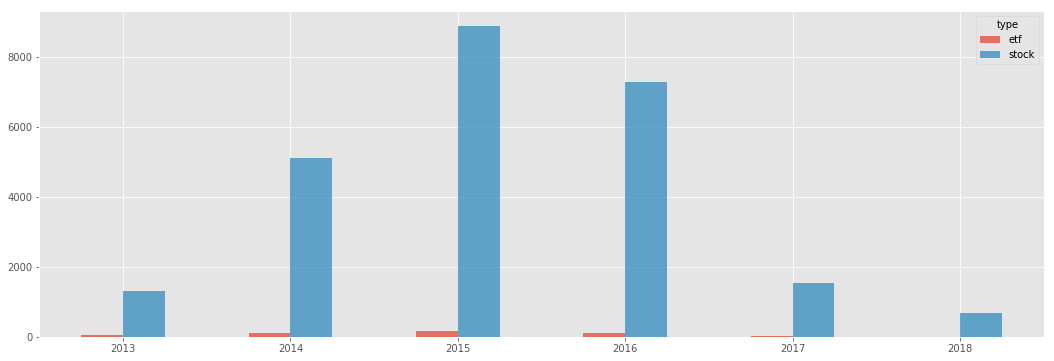

In [91]:
g=lp.groupby([lp.index.map(lambda x: x.year),'type'])['ndaq_issuesymbol'].count().unstack()
g.plot(figsize=(18,6),kind='bar',alpha=0.75, rot=0)

In [97]:
lp.loc['08/24/2015']

,ndaq_issuename,ndaq_issuesymbol,ndaq_mkt,ndaq_reasoncode,ndaq_resumptiondate,ndaq_resumptionquotetime,ndaq_resumptiontradetime,type
2015-08-24 09:30:15,ROI Acquisition Corp. II,ROIQU,Q,LUDP,08/24/2015,09:30:15,09:35:15,stock
2015-08-24 09:30:16,Synergy Pharma Unit,SGYPU,Q,LUDP,08/24/2015,09:30:16,09:35:16,stock
2015-08-24 09:30:16,Vanguard Short Term Gvt Bond,VGSH,Q,LUDP,08/24/2015,09:30:16,10:11:16,etf
2015-08-24 09:30:23,Celgene Corp,CELG,Q,LUDP,08/24/2015,09:30:23,09:35:23,stock
2015-08-24 09:30:25,First Trust Exchange-Traded Fu,MDIV,Q,LUDP,08/24/2015,09:30:25,09:53:25,etf
2015-08-24 09:30:26,First Trust Exchange-Traded Fu,TDIV,Q,LUDP,08/24/2015,09:30:26,09:45:26,etf
2015-08-24 09:30:27,DHX Media Variable Vtg Shs,DHXM,Q,LUDP,08/24/2015,09:30:27,09:35:27,stock
2015-08-24 09:30:29,First Trust Capital Stngth ETF,FTCS,Q,LUDP,08/24/2015,09:30:29,09:48:29,etf
2015-08-24 09:30:31,Galectin Therapeutics Inc.,GALTU,Q,LUDP,08/24/2015,09:30:31,09:35:31,stock
2015-08-24 09:30:38,Fidus Investment Corporation,FDUS,Q,LUDP,08/24/2015,09:30:38,09:48:38,stock


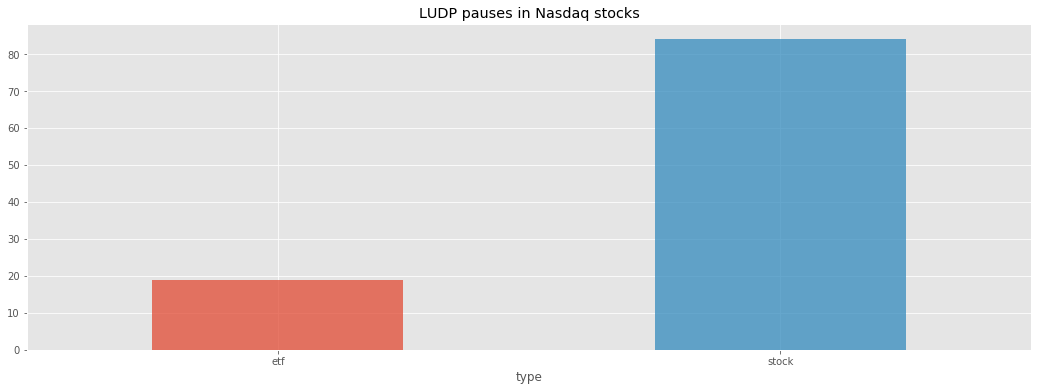

In [106]:
aug=lp['08/24/2015']
g=aug24.groupby('type')['ndaq_issuesymbol'].nunique()
g.plot(figsize=(18,6),kind='bar',alpha=0.75, rot=0,title='LUDP pauses in Nasdaq stocks')